In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [14]:
print(type(boston).__doc__)

Container object for datasets

    Dictionary-like object that exposes its keys as attributes.

    >>> b = Bunch(a=1, b=2)
    >>> b['b']
    2
    >>> b.b
    2
    >>> b.a = 3
    >>> b['a']
    3
    >>> b.c = 6
    >>> b['c']
    6

    


In [6]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [15]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [13]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [17]:
df['target']=boston['target']

In [18]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [19]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

### Feature engineering

In [20]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['target']

### Train and Test split data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Fit the model

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluate the model

In [23]:
y_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
mae,mse,rmse

(3.836528137727891, 28.551148765669435, 5.3433274993836415)

In [28]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [29]:
lr.coef_

array([-8.74917163e-02,  5.02793747e-02,  2.06785359e-02,  3.75457604e+00,
       -1.77933846e+01,  3.24118660e+00,  1.20902568e-02, -1.40965453e+00,
        2.63476633e-01, -1.03376395e-02, -9.52633123e-01,  6.20783942e-03,
       -5.97955998e-01])

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
lr.coef_, lr.intercept_

(array([-9.33605686e-02,  4.81959901e-02,  4.96289764e-02, -1.82392942e+01,
         3.30789165e+00,  1.79652125e-02, -1.40384760e+00,  2.91162133e-01,
        -1.18940633e-02, -1.02325193e+00,  7.11643167e-03, -6.09942441e-01]),
 41.138008414945105)

In [35]:
y_pred = lr.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

MAE 3.7472534301102223
MSE 27.881097588708815
RMSE 5.280255447296922


In [16]:
corr_choice = np.linspace(0.1, 1, 20)
corr_choice

array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])

In [17]:
split=[0.4,0.35,0.3,0.25]

In [18]:
features = c[(abs(c['target']) > 0.4) | (abs(c['target']) != 1)].index

In [20]:
def get_features(each_corr):
    return c[(abs(c['target']) > each_corr) & (abs(c['target']) != 1)].index

In [21]:
features = [ get_features(f) for f in corr_choice if len(get_features(f)) >2]

In [22]:
y = df['target']
def get_mae(f, t):
    X = df[f]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=101)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return mean_squared_error(y_test, y_pred)
    
    

[0.4, 0.35, 0.3, 0.25]

In [23]:
results = [ (f, t, get_mae(f,t)) for f in features for t in split]

[(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
         'PTRATIO', 'B', 'LSTAT'],
        dtype='object'), 0.4, 29.41264381235288),
 (Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
         'PTRATIO', 'B', 'LSTAT'],
        dtype='object'),
  0.35,
  29.217450297399296),
 (Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
         'PTRATIO', 'B', 'LSTAT'],
        dtype='object'), 0.3, 28.551148765669435),
 (Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
         'PTRATIO', 'B', 'LSTAT'],
        dtype='object'), 0.25, 30.119186452329153),
 (Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
         'PTRATIO', 'B', 'LSTAT'],
        dtype='object'), 0.4, 29.41264381235288),
 (Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
         'PTRATIO', 'B', 'LSTAT'],
        dtype='object'), 0.35, 29.21745029739

In [24]:
len(results)

36

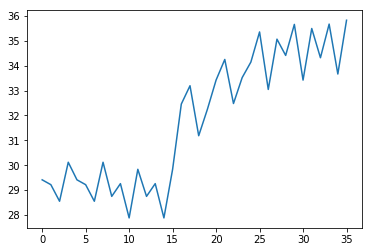

In [69]:
plt.plot(range(len(results)), [ i[2] for i in results])

In [72]:
results[10]

(Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'), 0.3, 27.881097588708815)

In [67]:
for i, row in enumerate(results):
    print(i, row[2])

0 29.41264381235288
1 29.217450297399296
2 28.551148765669435
3 30.119186452329153
4 29.41264381235288
5 29.217450297399296
6 28.551148765669435
7 30.119186452329153
8 28.74726348651466
9 29.259094679471264
10 27.881097588708815
11 29.835242739747677
12 28.74726348651466
13 29.259094679471264
14 27.881097588708815
15 29.835242739747677
16 32.459069320408005
17 33.195680506287054
18 31.185999019047884
19 32.24804114580533
20 33.42360072040948
21 34.25217737922359
22 32.480615610193546
23 33.52284720636132
24 34.14741205596323
25 35.358590187960466
26 33.04667860381774
27 35.06799396060298
28 34.414436777920265
29 35.66146057817436
30 33.42221442297456
31 35.49672239383004
32 34.321428780981144
33 35.674082565194276
34 33.66673754950589
35 35.82866602913105


In [31]:
len(features)

9